An outlier can significantly affect the value of the mean, but not the median.

- Compute the mean petal length of Iris versicolor from Anderson's classic data set. The variable versicolor_petal_length is provided in your namespace. Assign the mean to mean_length_vers.
- Print the result.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
# load iris dataset
iris = datasets.load_iris()
# Since this is a bunch, create a dataframe
df=pd.DataFrame(iris.data)
df['class']=iris.target
df.columns= ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species']
print (df.columns)
print(df.head(2))

setosa_petal_length = df[df['species']==0]['petal length (cm)']
virginica_petal_length = df[df['species']==1]['petal length (cm)']
versicolor_petal_length = df[df['species']==2]['petal length (cm)']

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   

   species  
0        0  
1        0  


In [2]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 5.552 cm


- Create percentiles, a NumPy array of percentiles you want to compute. These are the 2.5th, 25th, 50th, 75th, and 97.5th. You can do so by creating a list containing these ints/floats and convert the list to a NumPy array using np.array(). For example, np.array([30, 50]) would create an array consisting of the 30th and 50th percentiles.
- Use np.percentile() to compute the percentiles of the petal lengths from the Iris versicolor samples. The variable versicolor_petal_length is in your namespace.
- Print the percentiles.

In [3]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5,25,50,75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[4.8   5.1   5.55  5.875 6.7  ]


- Plot the percentiles as red diamonds on the ECDF. Pass the x and y co-ordinates - ptiles_vers and percentiles/100 - as positional arguments and specify the marker='D', color='red' and linestyle='none' keyword arguments. The argument for the y-axis - percentiles/100 has been specified for you.
- Display the plot.

In [5]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

x_vers, y_vers = ecdf(versicolor_petal_length)

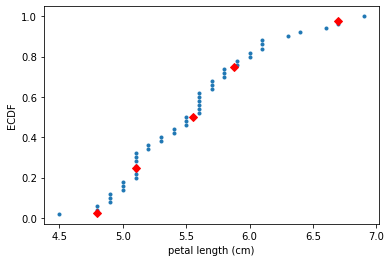

In [7]:
import matplotlib.pyplot as plt
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', c='red',
         linestyle='none')

# Show the plot
plt.show()


- The set-up is exactly the same as for the bee swarm plot; you just call sns.boxplot() with the same keyword arguments as you would sns.swarmplot(). The x-axis is 'species' and y-axis is 'petal length (cm)'.
- Don't forget to label your axes!
- Display the figure using the normal call.

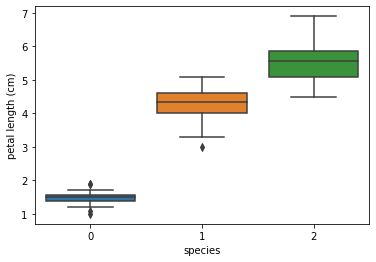

In [9]:
import seaborn as sns
# Create box plot with Seaborn's default settings
sns.boxplot(x= 'species', y = 'petal length (cm)',data = df)

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')

# Show the plot
plt.show()


- Create an array called differences that is the difference between the petal lengths (versicolor_petal_length) and the mean petal length. The variable versicolor_petal_length is already in your namespace as a NumPy array so you can take advantage of NumPy's vectorized operations.
- Square each element in this array. For example, x**2 squares each element in the array x. Store the result as diff_sq.
- Compute the mean of the elements in diff_sq using np.mean(). Store the result as variance_explicit.
- Compute the variance of versicolor_petal_length using np.var(). Store the result as variance_np.
- Print both variance_explicit and variance_np in one print call to make sure they are consistent.

In [10]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = np.square(differences)

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)


0.2984960000000002 0.2984960000000002


- Compute the variance of the data in the versicolor_petal_length array using np.var() and store it in a variable called variance.
- Print the square root of this value.
- Print the standard deviation of the data in the versicolor_petal_length array using np.std().

In [11]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.5463478745268441
0.5463478745268441


- Use plt.plot() with the appropriate keyword arguments to make a scatter plot of versicolor petal length (x-axis) versus petal width (y-axis). The variables versicolor_petal_length and versicolor_petal_width are already in your namespace. Do not forget to use the marker='.' and linestyle='none' keyword arguments.
- Label the axes.
- Display the plot.

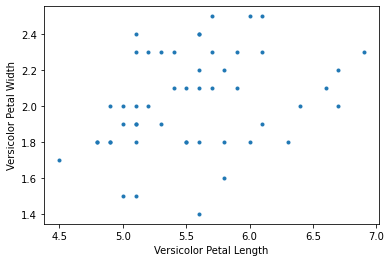

In [13]:
versicolor_petal_width = df[df['species']==2]['petal width (cm)']
# Make a scatter plot
plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.' , linestyle='none')


# Label the axes
plt.xlabel("Versicolor Petal Length")
plt.ylabel("Versicolor Petal Width")

# Show the result
plt.show()

Covariance = Variability, 
Correlation = how 2 features are related

- Use np.cov() to compute the covariance matrix for the petal length (versicolor_petal_length) and width (versicolor_petal_width) of I. versicolor.
- Print the covariance matrix.
- Extract the covariance from entry [0,1] of the covariance matrix. Note that by symmetry, entry [1,0] is the same as entry [0,1].
- Print the covariance.

In [14]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)


[[0.30458776 0.04882449]
 [0.04882449 0.07543265]]
0.04882448979591837


- Define a function with signature pearson_r(x, y).
- Use np.corrcoef() to compute the correlation matrix of x and y (pass them to np.corrcoef() in that order).
- The function returns entry [0,1] of the correlation matrix.
- Compute the Pearson correlation between the data in the arrays versicolor_petal_length and versicolor_petal_width. Assign the result to r.
- Print the result.

In [15]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.3221082159003183
